<a href="https://colab.research.google.com/github/Mfr3ak/PyTorch-Practice/blob/PyTorch_Practice_Solutions/extras/exercises/New%20Practice/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.1.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Ways to overcome overfitting
# 1. More data (Using data augmentation)
# 2. Reduce the size/complexity of the neural network
# 3. Dropouts
# 4. Early Stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torchvision
from torchvision import datasets

from torchvision import transforms

train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor()) # do we want to transform the data as we download it?

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 113359448.26it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27518331.17it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32114209.68it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17255913.74it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [29]:
train_data[245][0].shape

torch.Size([1, 28, 28])

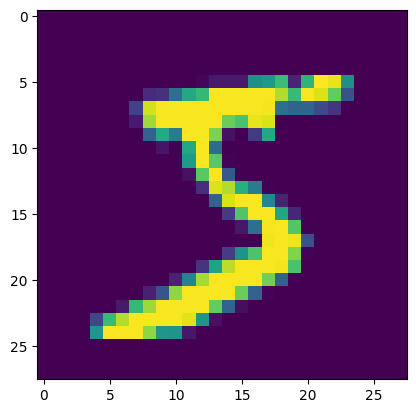

In [4]:
import matplotlib.pyplot as plt
import numpy as np
img = np.asarray(train_data[0][0].permute(1,2,0))
plt.imshow(img)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,
                              batch_size = 32,
                              shuffle = True)
test_dataloader = DataLoader(test_data,
                              batch_size = 32)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [17]:
from torch import nn
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels = 10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU()) #28x28
        self.layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=10,
                      out_channels = 10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                         padding=1))
        self.layer_3 = nn.Sequential(
            nn.Conv2d(in_channels=10,
                      out_channels = 10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU())
        self.layer_4 = nn.Sequential(
            nn.Conv2d(in_channels=10,
                      out_channels = 10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                         padding=0))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 490,
                      out_features = 10)
            )
    def forward(self,X):
        X = self.layer_1(X)
        # print(f"Shape of Image of layer 1 : {X.shape}")
        X = self.layer_2(X)
        # print(f"Shape of Image of layer 2 : {X.shape}")
        X = self.layer_3(X)
        # print(f"Shape of Image of layer 3 : {X.shape}")
        X = self.layer_4(X)
        # print(f"Shape of Image of layer 4 : {X.shape}")
        return self.classifier(X)

model_2 = TinyVGG().to(device)

In [58]:
sample = train_data[0][0].unsqueeze(dim = 1).to(device)

In [60]:
sample_pass = model_2(sample)

Shape of Image of layer 1 : torch.Size([1, 10, 28, 28])
Shape of Image of layer 2 : torch.Size([1, 10, 15, 15])
Shape of Image of layer 3 : torch.Size([1, 10, 15, 15])
Shape of Image of layer 4 : torch.Size([1, 10, 7, 7])


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [18]:
loss_fn = nn.CrossEntropyLoss()
loss_test_final = 0
optimizer = torch.optim.SGD(params = model_2.parameters(),lr =0.1)

epochs = 6
from tqdm.auto import tqdm
for epoch in tqdm(range(epochs)):
    loss_train_2 = 0
    for batch,(X_train,y_train) in enumerate(train_dataloader):
        model_2.train()
        X_train, y_train = X_train.to(device), y_train.to(device)
        initial_pred = model_2(X_train)
        train_loss = loss_fn(initial_pred,y_train)
        loss_train_2 = loss_train_2+train_loss
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    loss_train_2 = loss_train_2/len(train_dataloader)
    model_2.eval()
    with torch.inference_mode():
        total_test_loss = 0
        for batch,(X_test,y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_preds = model_2(X_test)
            test_loss = loss_fn(test_preds,y_test)
            total_test_loss = total_test_loss+test_loss
            total_test_loss = total_test_loss/len(test_dataloader)
    print(f"Total training loss : {loss_train_2} & Total Testing loss : {total_test_loss}")

  0%|          | 0/6 [00:00<?, ?it/s]

Total training loss : 0.5692558884620667 & Total Testing loss : 9.047297680808697e-06
Total training loss : 0.08820917457342148 & Total Testing loss : 7.72969201534579e-07
Total training loss : 0.06881324201822281 & Total Testing loss : 4.567185897030868e-06
Total training loss : 0.05923178046941757 & Total Testing loss : 4.3307527448632754e-06
Total training loss : 0.05207790061831474 & Total Testing loss : 1.8548386151451268e-06
Total training loss : 0.04859835281968117 & Total Testing loss : 1.1852260968225892e-06


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

tensor([[ 0.9496, -4.9490,  0.2797, -6.7311,  6.3944,  1.5481, 16.3347, -4.2993,
          0.1983, -9.2357]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[2.0813e-07, 5.7095e-10, 1.0651e-07, 9.6076e-11, 4.8190e-05, 3.7866e-07,
         9.9995e-01, 1.0933e-09, 9.8179e-08, 7.8506e-12]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([6], device='cuda:0')


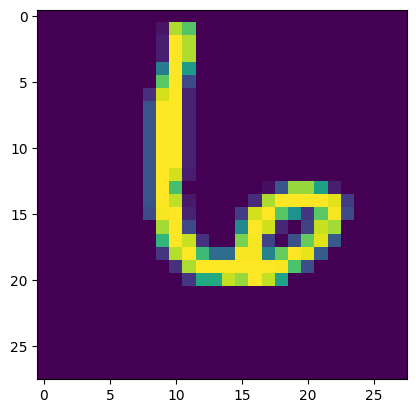

In [25]:
i=156
sample_logits = model_2(test_data[i][0].unsqueeze(dim=0).to(device))
sample_probs = torch.softmax(sample_logits,dim = 1)
sample_lables = torch.argmax(sample_probs,dim = 1)
print(sample_logits)
print(sample_probs)
print(sample_lables)
plt.imshow(test_data[i][0].permute(1,2,0))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [30]:
train_data_f = datasets.FashionMNIST(root = ".",
                                     train= True,
                                     transform = transforms.ToTensor(),
                                     download = True)
test_data_f = datasets.FashionMNIST(root = ".",
                                     train= False,
                                     transform = transforms.ToTensor(),
                                     download = True)